In [7]:
import numpy as np

from __future__ import print_function
from standard_plots import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

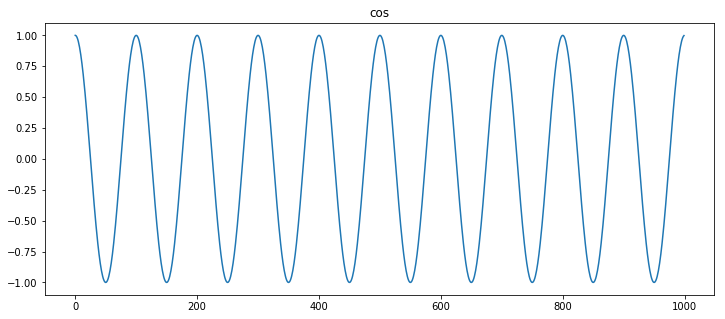

In [27]:
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))
plt_plot(y = dataset, title = 'cos')

In [28]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [29]:
x,y = create_dataset(dataset, look_back=3)
print(x.shape)
print(y.shape)
print(x[:5])
print(y[:5])

(997, 3)
(997,)
[[ 1.          0.99802673  0.9921147 ]
 [ 0.99802673  0.9921147   0.98228725]
 [ 0.9921147   0.98228725  0.96858316]
 [ 0.98228725  0.96858316  0.95105652]
 [ 0.96858316  0.95105652  0.92977649]]
[ 0.98228725  0.96858316  0.95105652  0.92977649  0.90482705]


## 20长度的滑动窗口进行预测

In [30]:
look_back = 20

#归一化，y值域为(0,1)
dataset = (dataset+1) / 2.

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [31]:
print('trainX.shape = ', trainX.shape)
print('testX.shape = ', testX.shape)
print('trainY.shape = ',trainY.shape)
print('testY.shape = ', testY.shape)

trainX.shape =  (780, 20, 1)
testX.shape =  (180, 20, 1)
trainY.shape =  (780,)
testY.shape =  (180,)


In [32]:
%%time
batch_size = 1
model = Sequential()
model.add(LSTM(32,input_dim=1,input_length=20))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(trainX,trainY,batch_size = batch_size,nb_epoch=20,)

/Users/yousheng/PycharmProjects/virtualenv/tf/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yousheng/PycharmProjects/virtualenv/tf/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(20, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yousheng/PycharmProjects/virtualenv/tf/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
780/780 [==============================] - 18s 23ms/step - loss: 0.0449
Epoch 2/20
780/780 [==============================] - 17s 22ms/step - loss: 0.0053
Epoch 3/20
780/780 [==============================] - 16s 20ms/step - loss: 0.0037
Epoch 4/20
780/780 [==============================] - 16s 21ms/step - loss: 0.0030 0s - loss: 0.
Epoch 5/20
780/780 [==============================] - 18s 23ms/step - loss: 0.0026
Epoch 6/20
780/780 [==============================] - 17s 22ms/step - loss: 0.0028
Epoch 7/20
780/780 [==============================] - 17s 22ms/step - loss: 0.0024
Epoch 8/20
780/780 [==============================] - 17s 22ms/step - loss: 0.0026
Epoch 9/20
780/780 [==============================] - 17s 22ms/step - loss: 0.0022
Epoch 10/20
780/780 [==============================] - 17s 22ms/step - loss: 0.0022
Epoch 11/20
780/780 [==============================] - 17s 22ms/step - loss: 0.0018
Epoch 12/20
780/780 [==============================] - 17s 22ms/step - 